<a href="https://colab.research.google.com/github/luisDur8/Analisis-Avanzado-R/blob/main/R4_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisis-Avanzado-R
Pronóstico de valores para el año siguiente, se consideran datos de los 4 años inmediatos anteriores. Se usa la fórmula de suavizamiento exponencial.


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




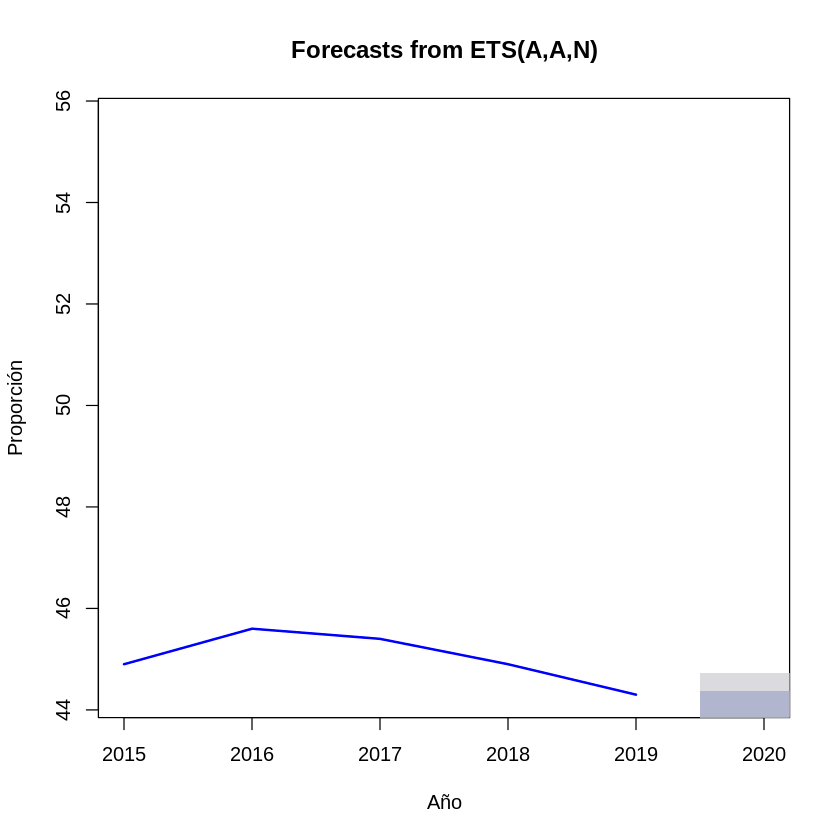

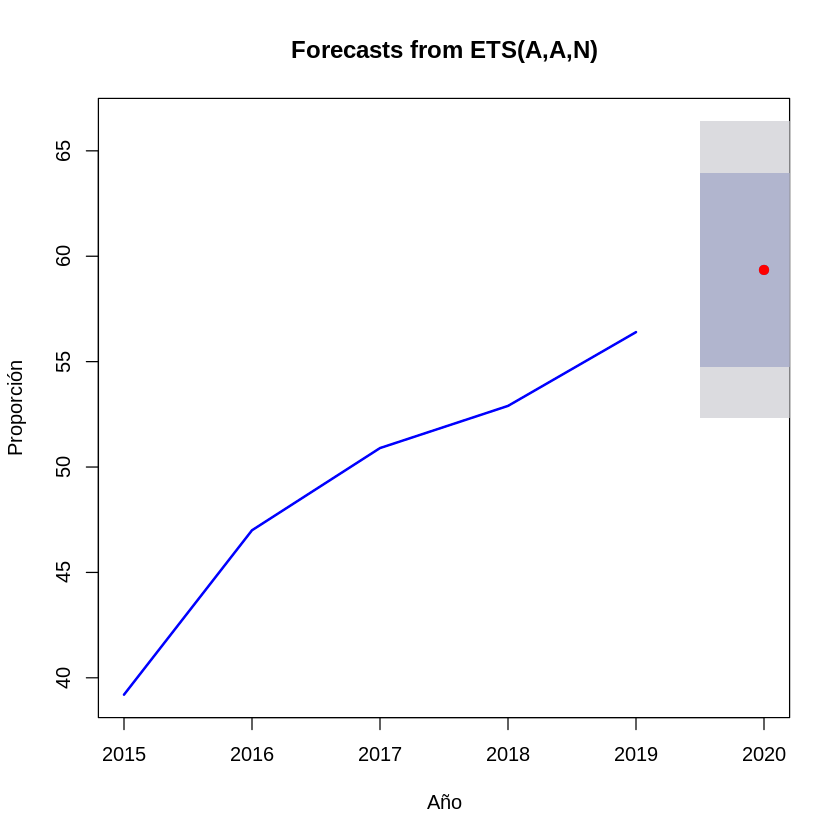

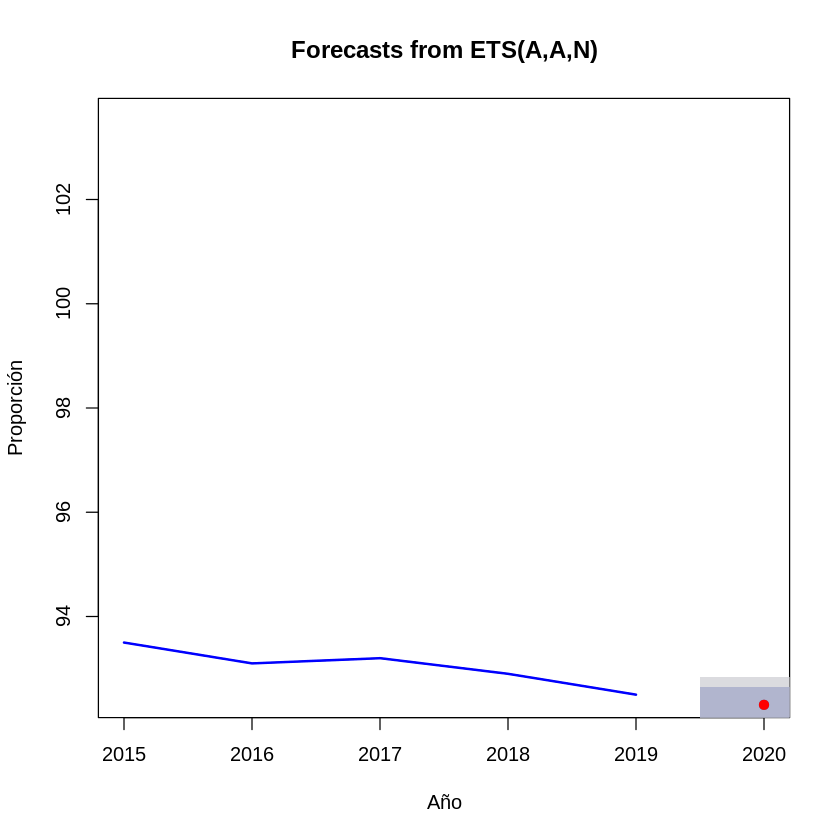

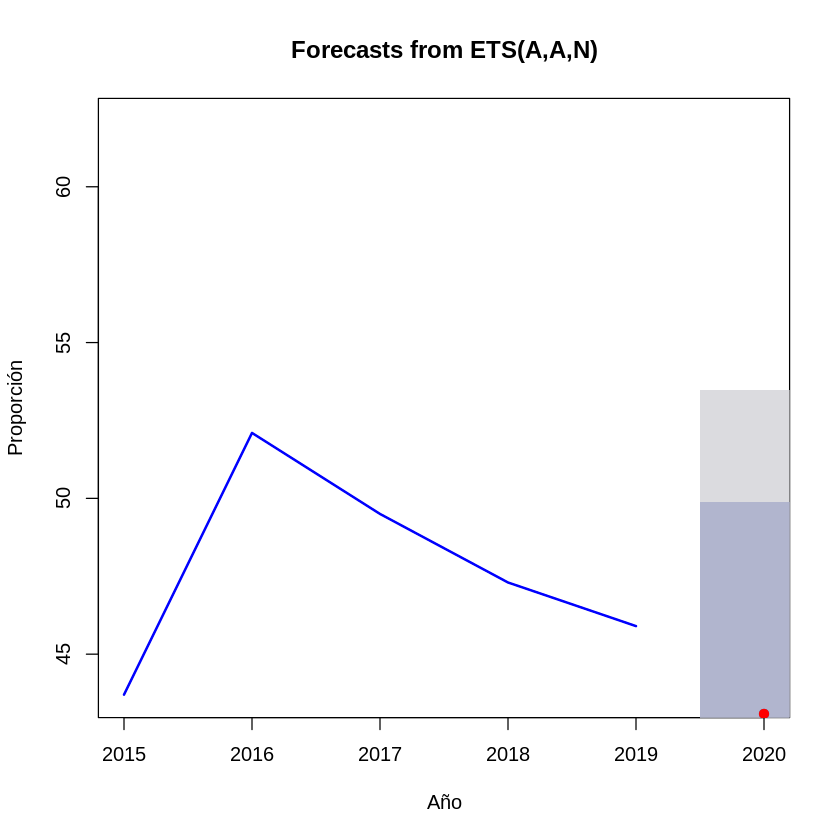

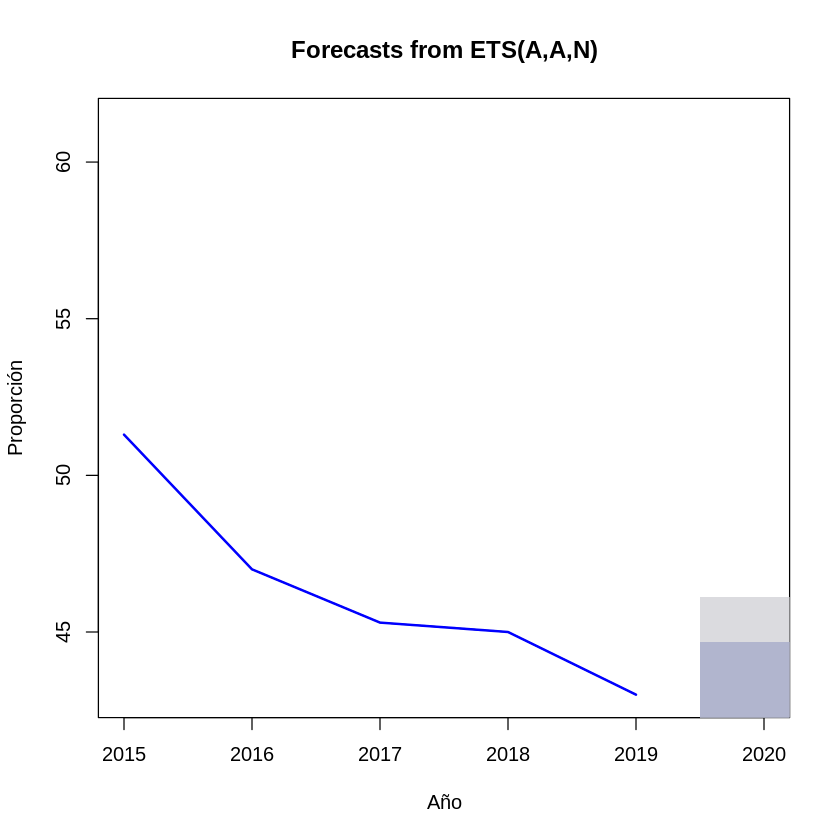

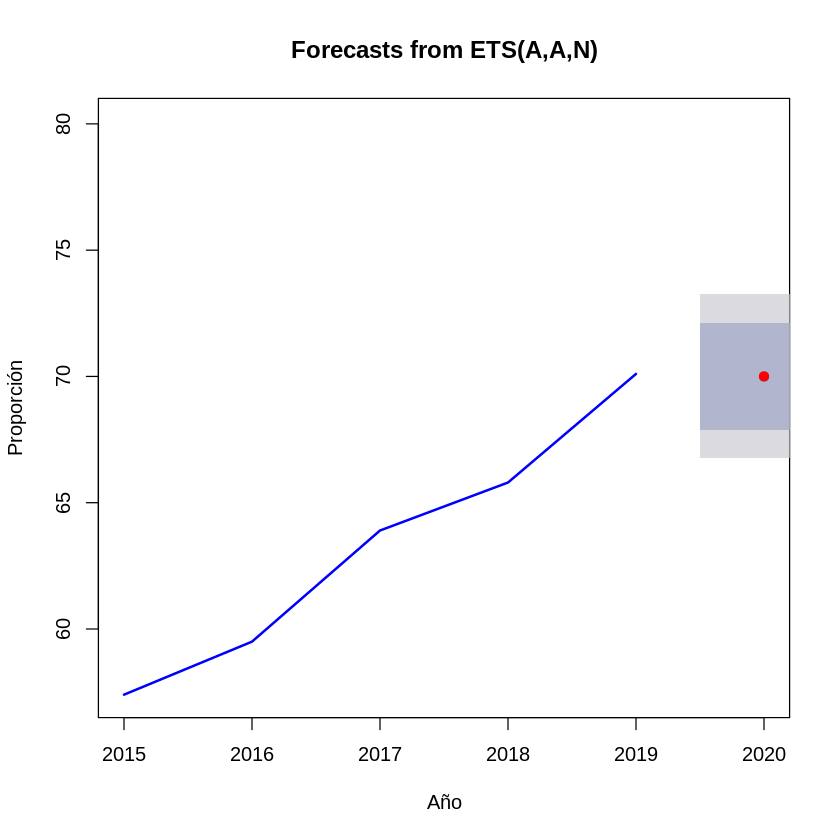

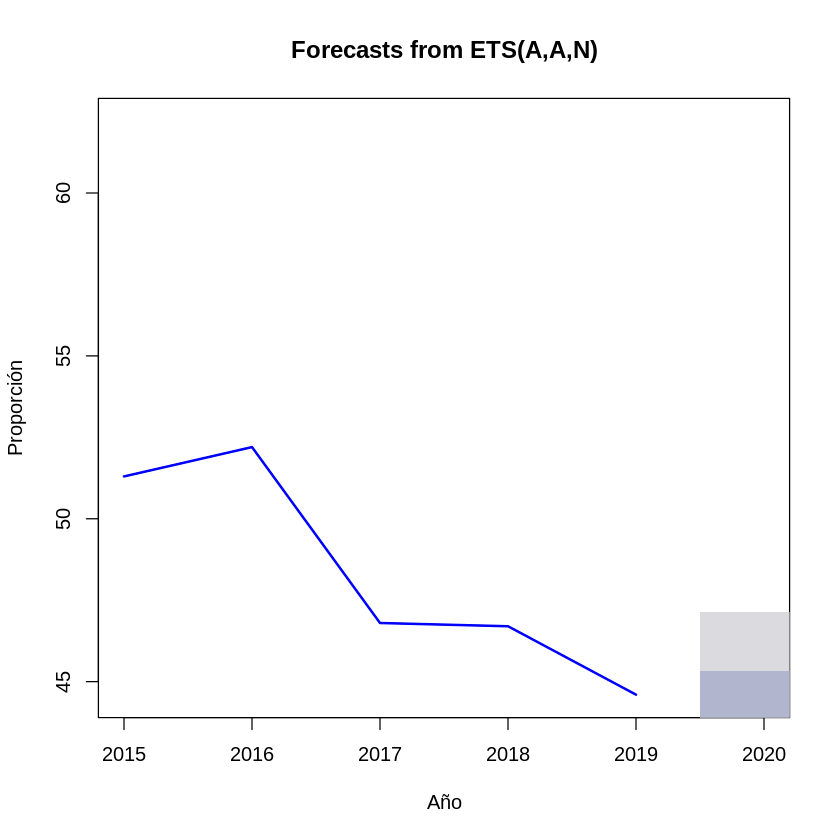

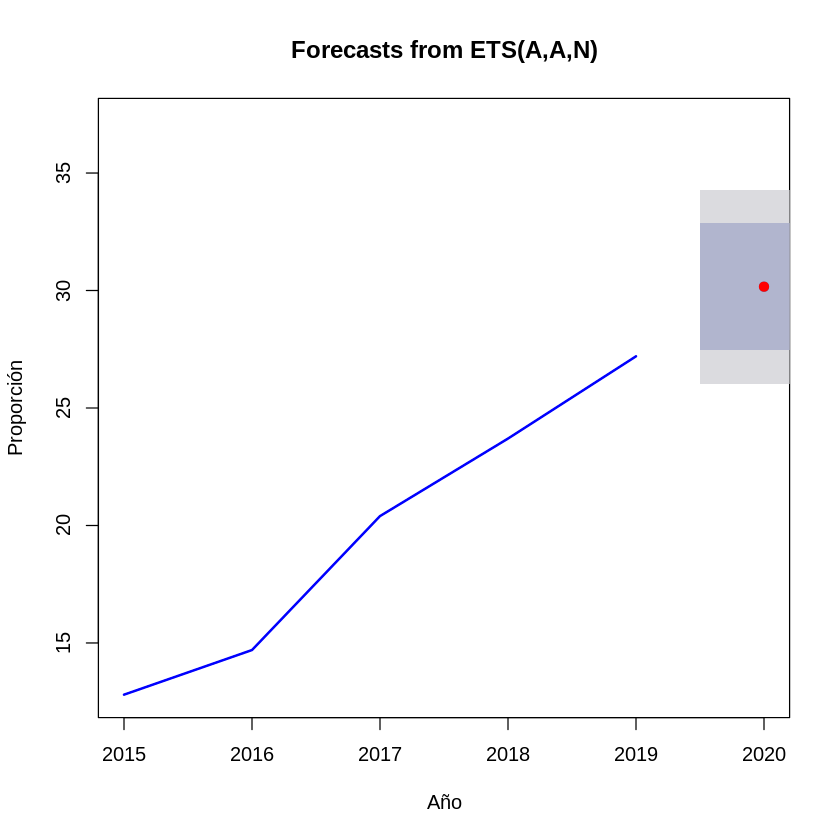

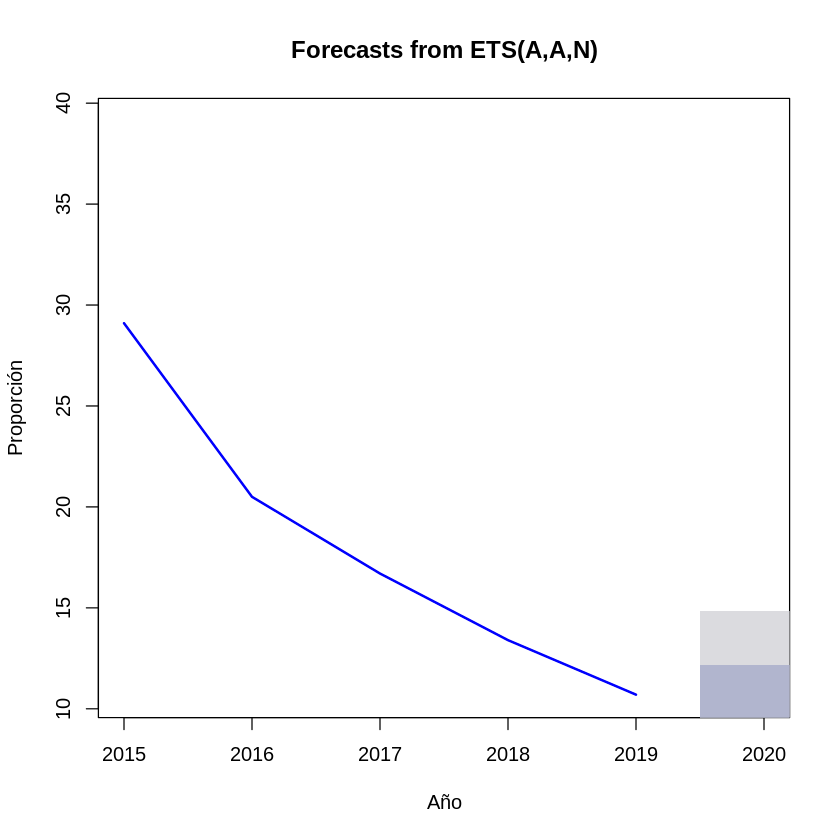

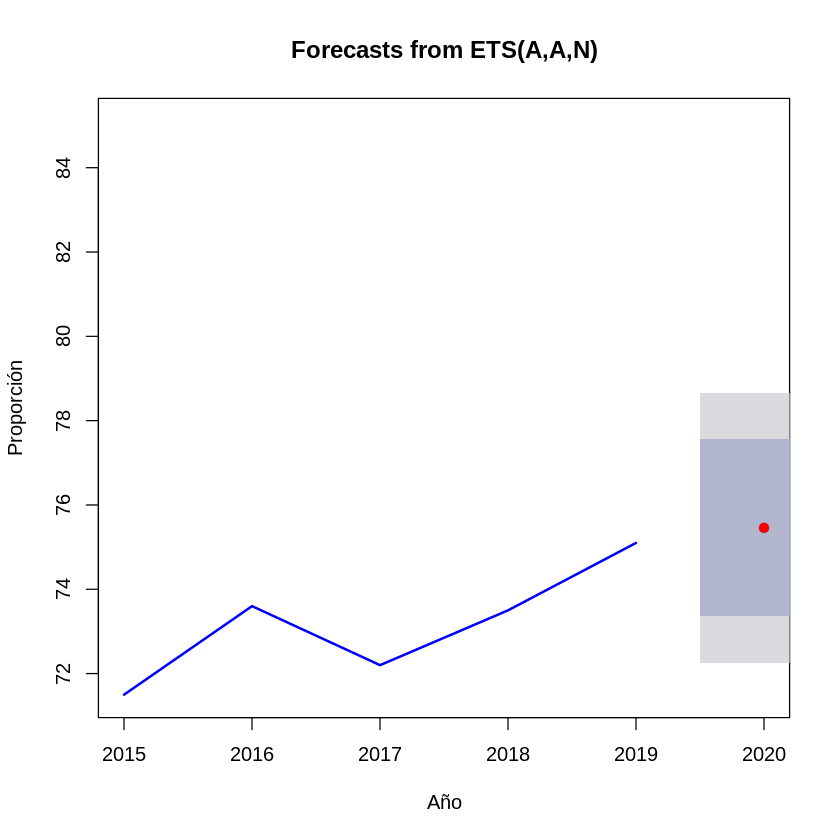

In [13]:
# Carga de las bibliotecas necesarias
library(forecast)
library(ggplot2)
library(dplyr)

# Creación del dataframe con los datos
data <- data.frame(
  'Clave Indicador' = c('HC', 'HI', 'HT', 'HTP', 'U6E', 'UI6E', 'UCHE', 'UITI', 'UIFH', 'UTC6E'),
  'Descripción del indicador' = c('Hogares con computadora', 'Hogares con conexión a Internet', 'Hogares con televisión', 'Hogares con televisión de paga',
                                  'Usuarios de computadora', 'Usuarios de Internet', 'Usuarios de computadora con apoyo escolar', 'Usuarios de Internet con transacciones',                                  'Usuarios de Internet con acceso externo', 'Usuarios de teléfono celular'),
  '2015' = c(44.9, 39.2, 93.5, 43.7, 51.3, 57.4, 51.3, 12.8, 29.1, 71.5),
  '2016' = c(45.6, 47, 93.1, 52.1, 47, 59.5, 52.2, 14.7, 20.5, 73.6),
  '2017' = c(45.4, 50.9, 93.2, 49.5, 45.3, 63.9, 46.8, 20.4, 16.7, 72.2),
  '2018' = c(44.9, 52.9, 92.9, 47.3, 45, 65.8, 46.7, 23.7, 13.4, 73.5),
  '2019' = c(44.3, 56.4, 92.5, 45.9, 43, 70.1, 44.6, 27.2, 10.7, 75.1))

# Pronóstico y gráficas para cada indicador
for(i in 1:nrow(data)){
  indicador <- data[i, "Descripción del indicador"]
  valores <- ts(as.numeric(data[i, 3:7]), start = 2015)

  # Aplicación de suavizamiento exponencial
  model <- ets(valores, model = "AAN")
  forecast <- forecast(model, h = 1)

  # Creación de gráfica de líneas de crecimiento
  plot(forecast, main = indicador, xlab = "Año", ylab = "Proporción", ylim = c(min(valores), max(valores)+10))
  lines(valores, col = "blue", lwd = 2)
  points(2020, forecast$mean, col = "red", pch = 19)

  # Guarda la gráfica en un archivo PNG
  dev.copy(png, filename = paste("grafica_", i, ".png", sep = ""))
  dev.off()
}

# Archivo guardado en Drive y en Github (https://github.com/luisDur8/Analisis-Avanzado-R)
